In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
import pickle
import pandas as pd
import scanpy as sc

import random
random.seed(42)
import seaborn as sns

In [2]:
!ls figures/multiregressor/*/*v1*.tsv

figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_test_103.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_test_21.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_test_42.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_test_7.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_test_mTeSR_103.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_test_mTeSR_21.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_test_mTeSR_42.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_test_mTeSR_48.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_test_mTeSR_7.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_train_103.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_train_21.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_train_42.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_train_7.tsv
figures/multiregressor/iGABA_post/subsampled_multi_v1_BM_train_mTeSR_

In [3]:
color_dict = {}
color_dict['M_SHH'] = ['w',"#C2D9F7", "#98C1F0", "#4782DD", "#1D52A1"]
color_dict['M_RA'] = ['w', "#aadce0","#72bcd5", "#528fad", "#376795"]
color_dict['M_BMP4'] = ['w', "#ffe6b7", "#ffd353","#ffb242"]
color_dict['M_XAV'] = ['w', "#f9b4c9","#d8527c","#9a133d"]
color_dict['M_CHIR'] = ['w',"#dec5da", "#b695bc", "#90719f", "#574571"]
color_dict['M_FGF8'] = ['w','#ffbbff','#ee7ae9','#b452cd','#8b008b']


iGlut_pre
NIM


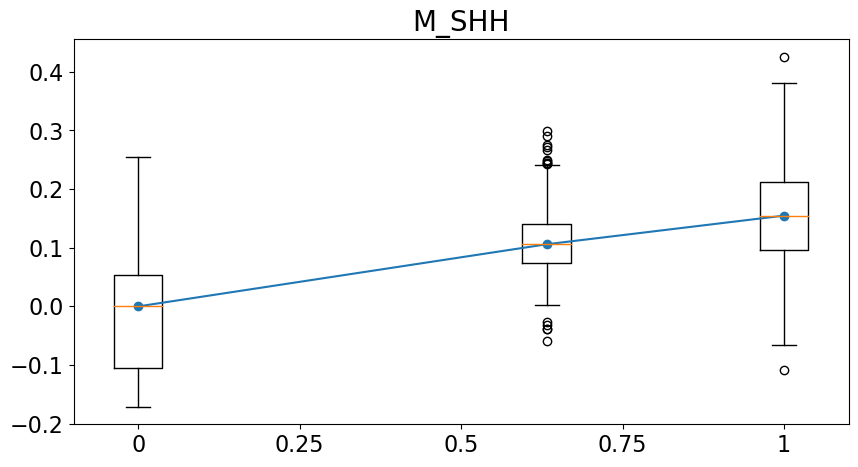

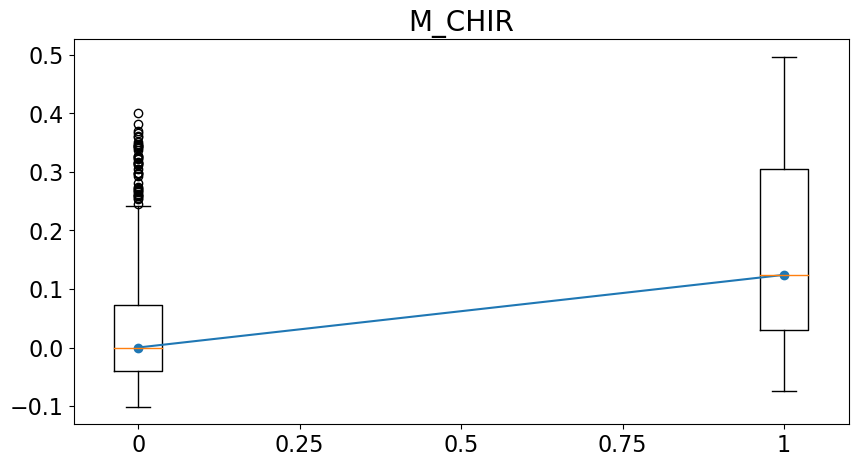

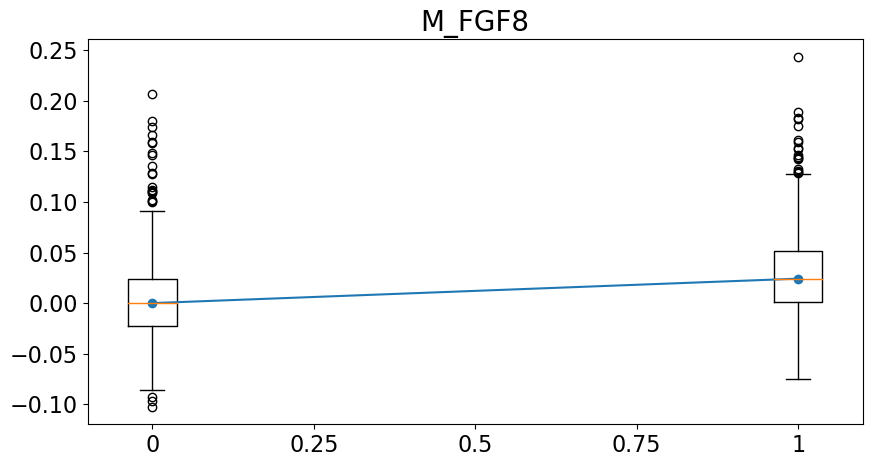

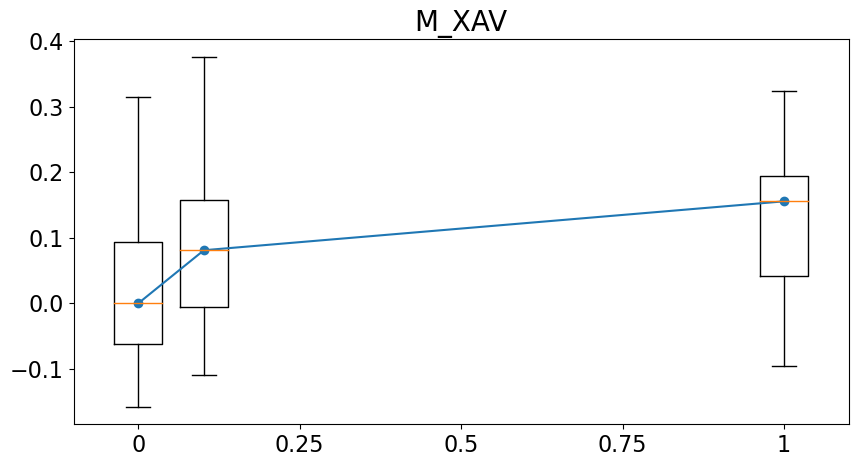

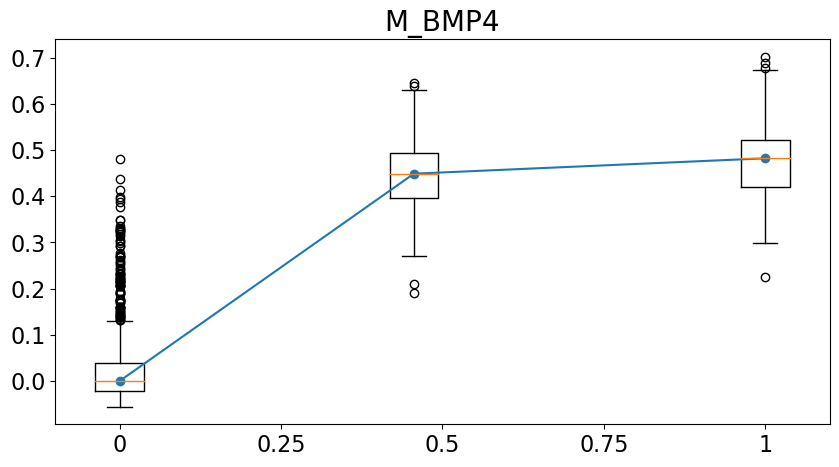

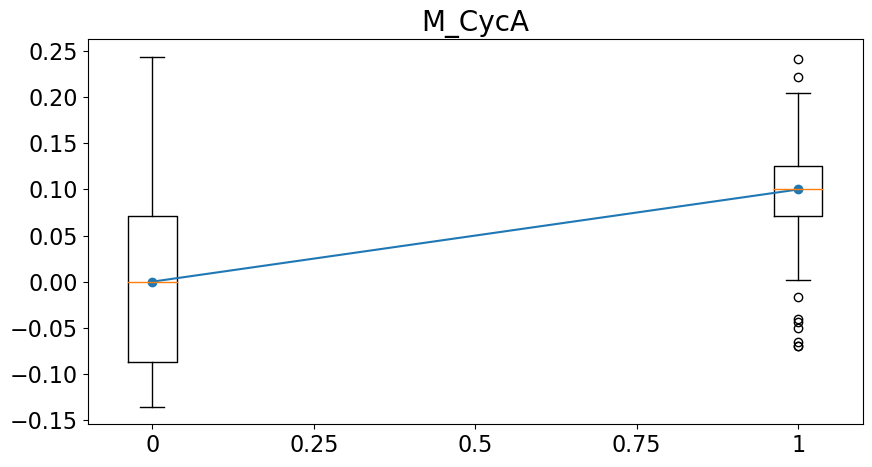

N2B27_2Si


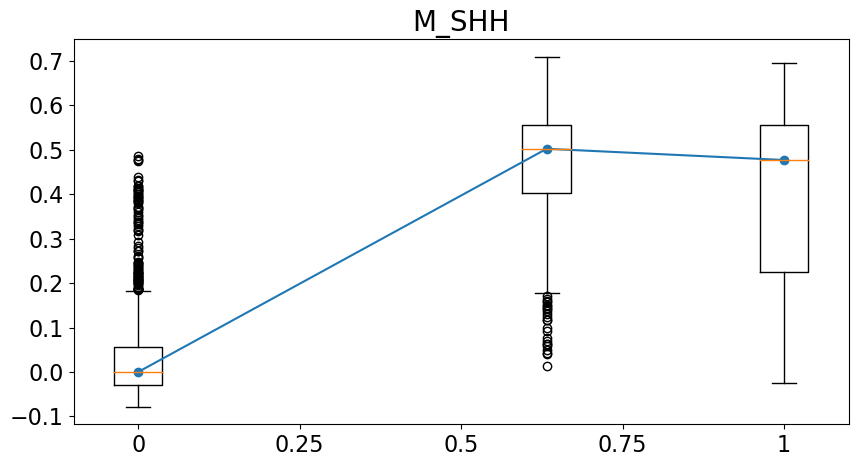

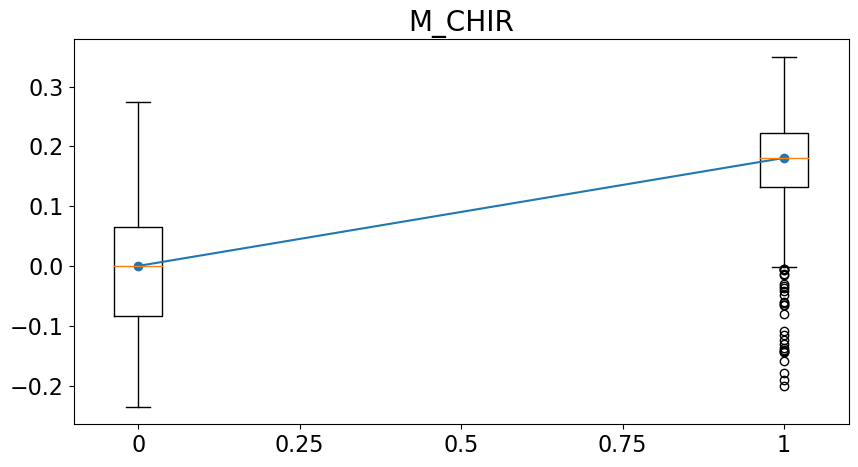

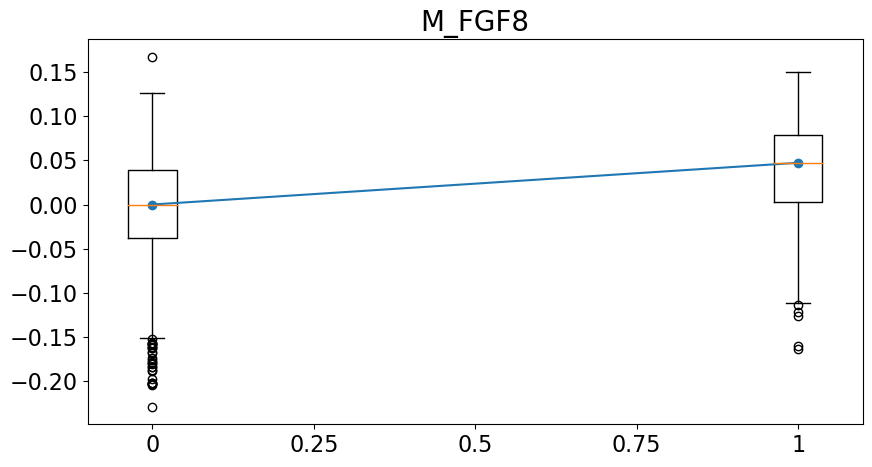

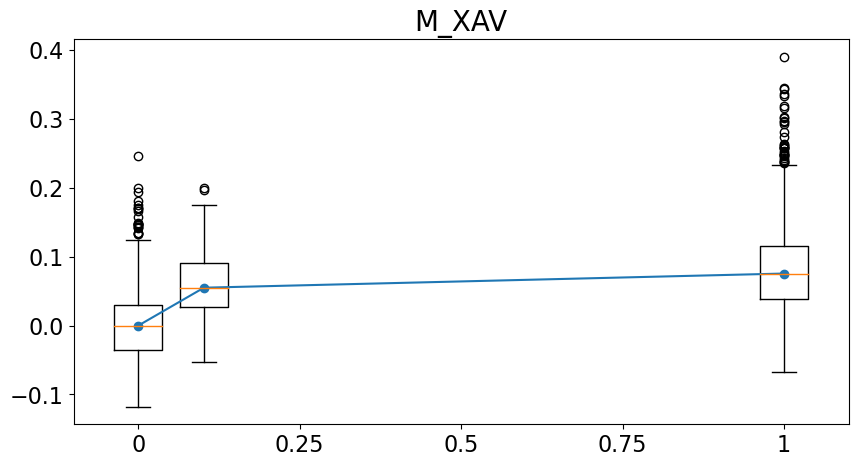

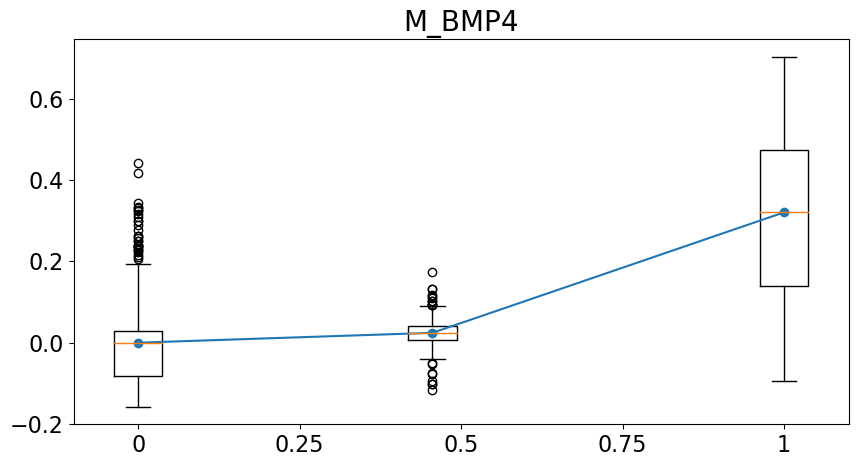

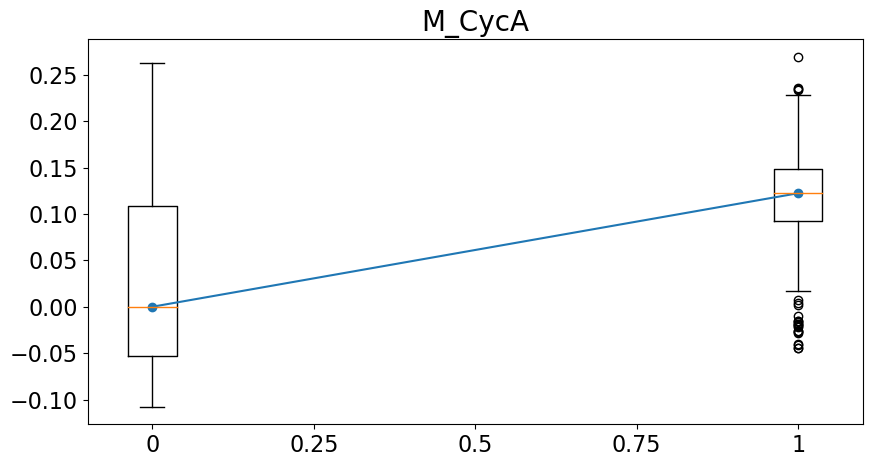

N2B27_SB_CHIR


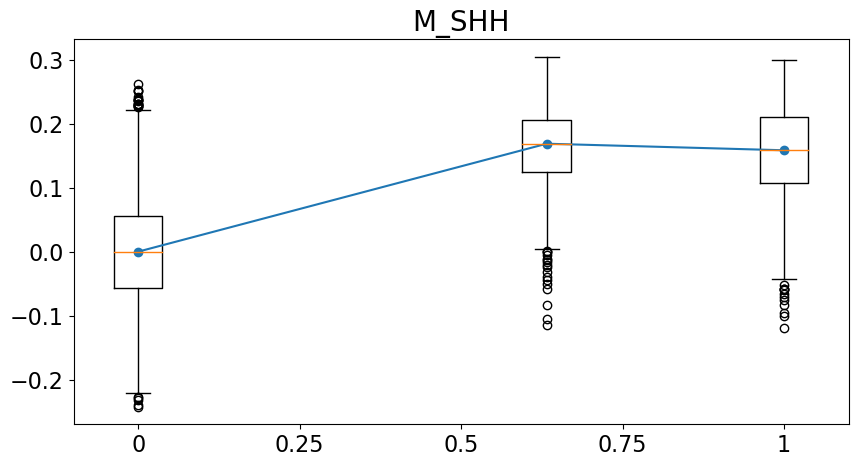

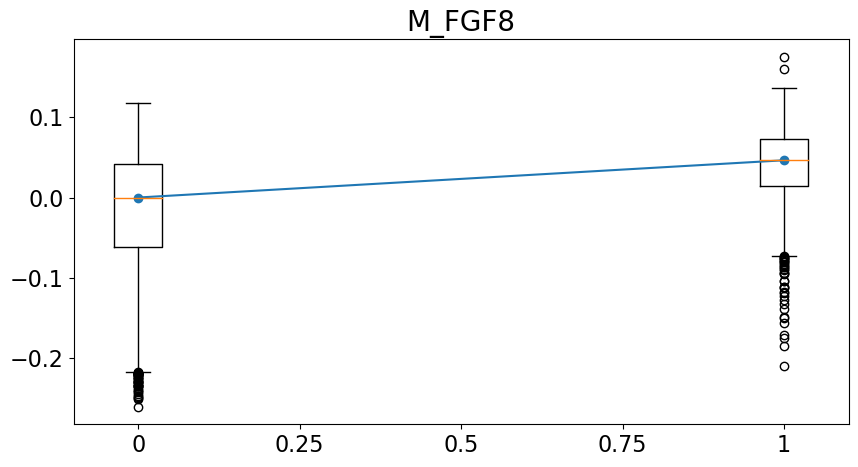

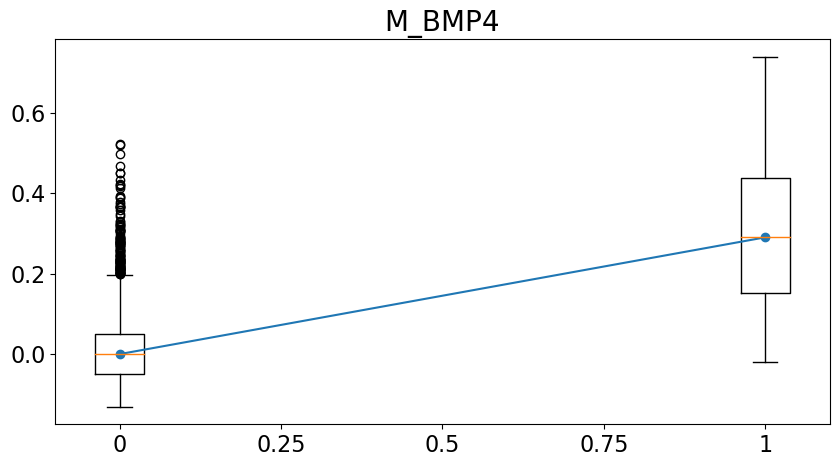

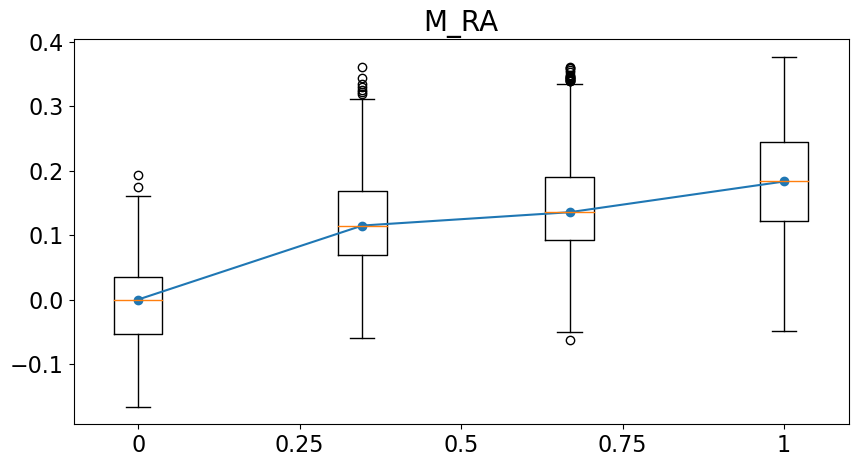

mTeSR
mTeSR not used in  iGlut_pre
iGlut_post
NIM
NIM not used in  iGlut_post
N2B27_2Si
N2B27_2Si not used in  iGlut_post
N2B27_SB_CHIR
N2B27_SB_CHIR not used in  iGlut_post
mTeSR


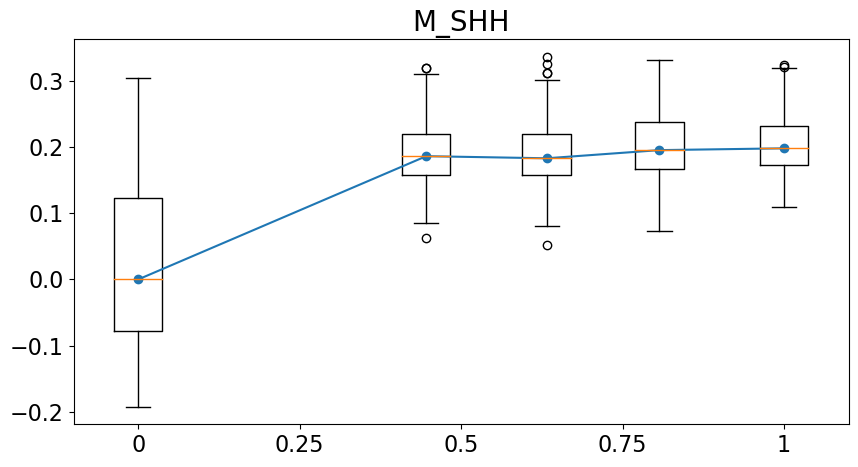

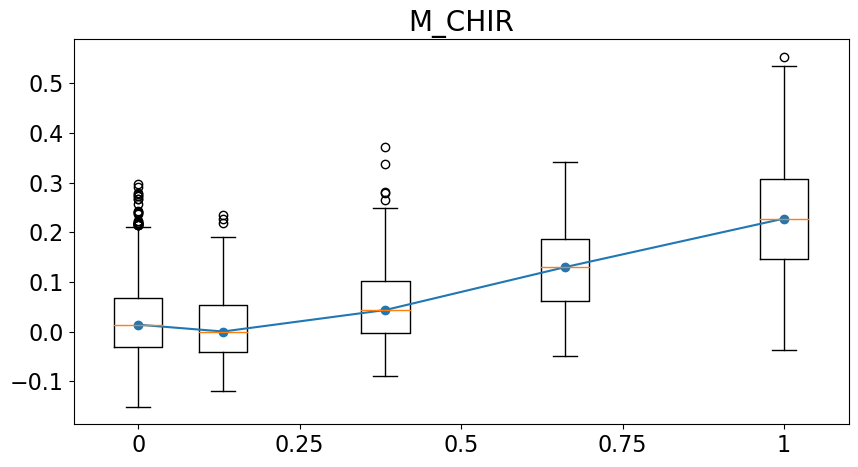

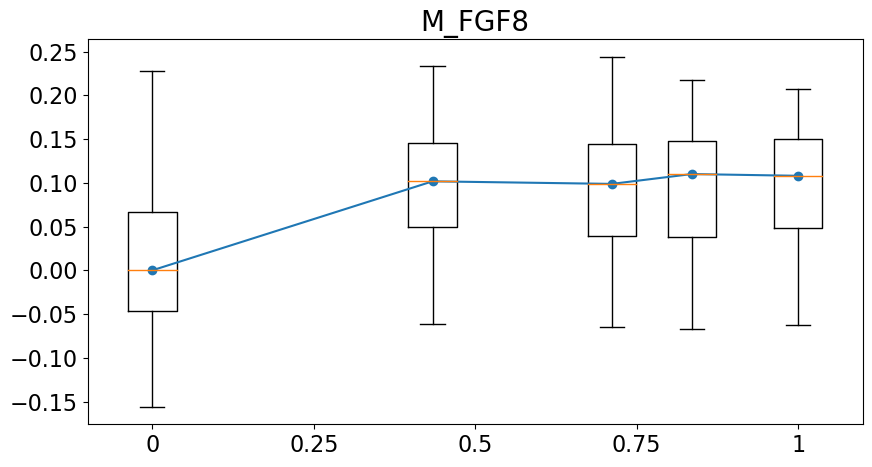

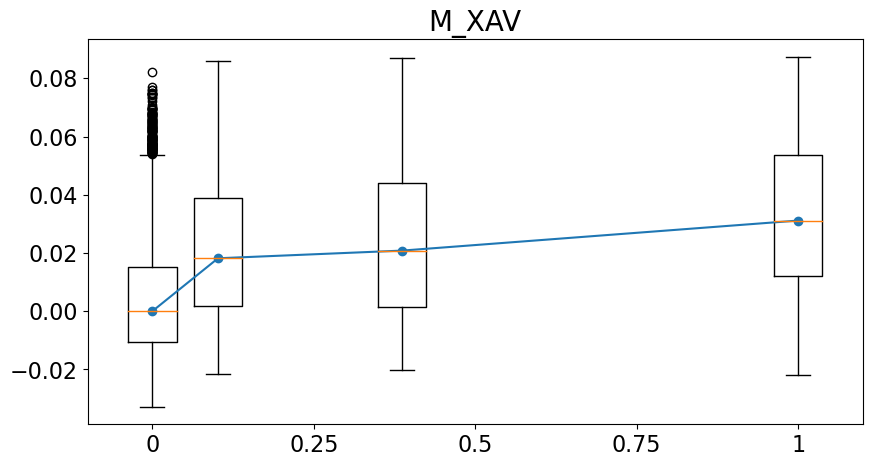

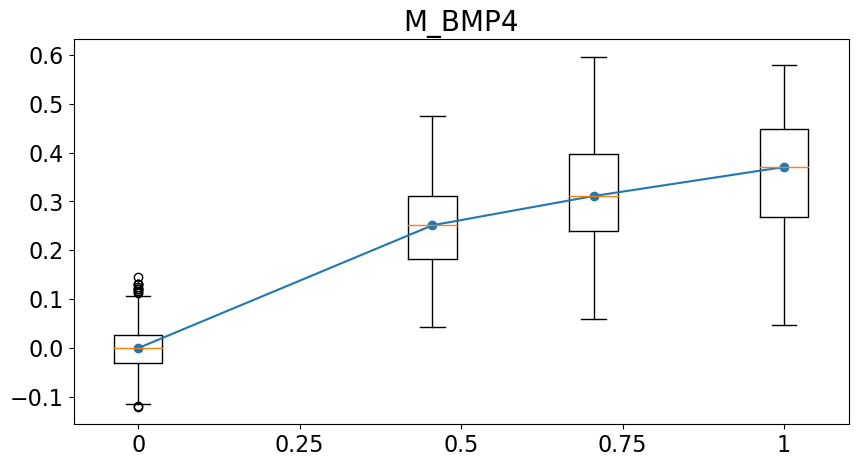

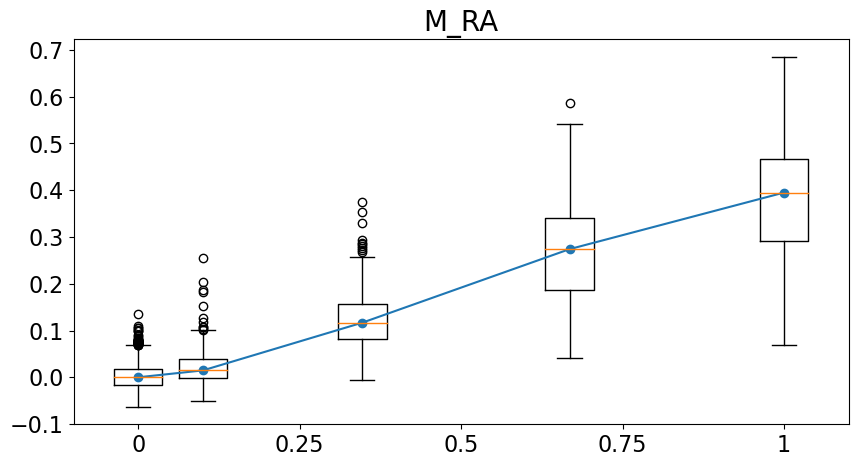

In [5]:
for sample in ['iGlut_pre','iGlut_post']:
    print(sample)
    for BM in ['NIM','N2B27_2Si','N2B27_SB_CHIR','mTeSR']:
        print(BM)
        try:
            test_files = !ls figures/multiregressor/{sample}/*v1_BM_test*{BM}*42.tsv
            for file in test_files:
                comb = pd.read_csv(file,sep="\t",index_col=0)
                
                morphogens = ['M_RA','M_BMP4','M_FGF8','M_CHIR','M_XAV','M_SHH','M_CycA']
                morphogens_medium = [x for x in morphogens if x in comb.columns]
                morphogens_medium = set(morphogens_medium)
                
                for morph in morphogens_medium:  
                    plt.figure(figsize=(10,5))

                    #get concentration and colors
                    morph_concs = list(set(comb[morph]))
                    #box_colors = color_dict[morph]


                    # Calculate the medians
                    medians = comb.groupby(morph)[morph+'_pred'].median()
                    medians_x = np.array(medians.index)
                    medians_y = np.array(medians)


                    for conc in morph_concs:
                        comb_conc = comb.loc[comb[morph]==conc].copy()
                        y_values_boxplot = comb_conc[morph+"_pred"]
                        y_values_boxplot = y_values_boxplot - np.min(medians_y)
                        pos = conc
                        plt.boxplot(y_values_boxplot,positions=[pos],widths=0.075)


                    plt.plot(medians_x,medians_y-np.min(medians_y),'o-')
                    plt.xlim([-0.1,1.1])
                    plt.xticks(ticks=[0,0.25,0.5,0.75,1],labels=[0,0.25,0.5,0.75,1],fontsize=16)
                    plt.yticks(fontsize=16)
                    #plt.ylim([-0.1,1.1*np.max(medians_y)])
                    plt.title(morph,fontsize=20)
                    plt.show()
                    plt.close()
        except:
            print(BM+" not used in ",sample)

In [6]:
palette=color_dict[morph]

In [13]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42


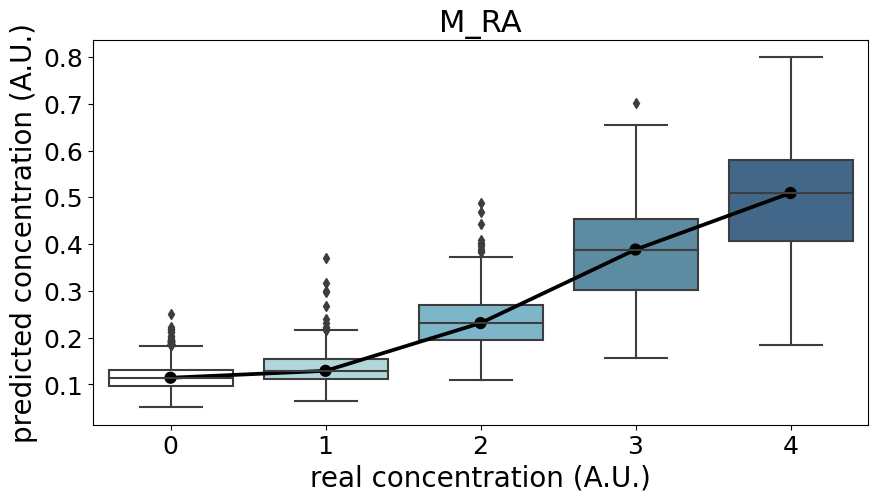

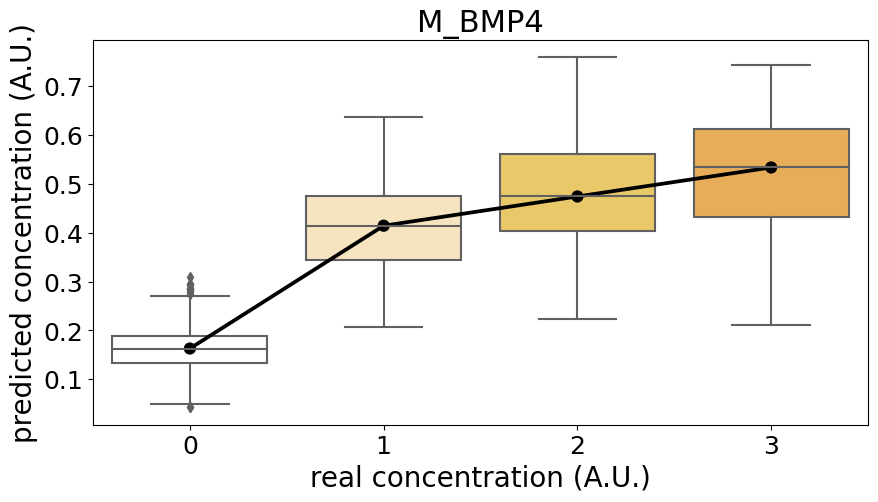

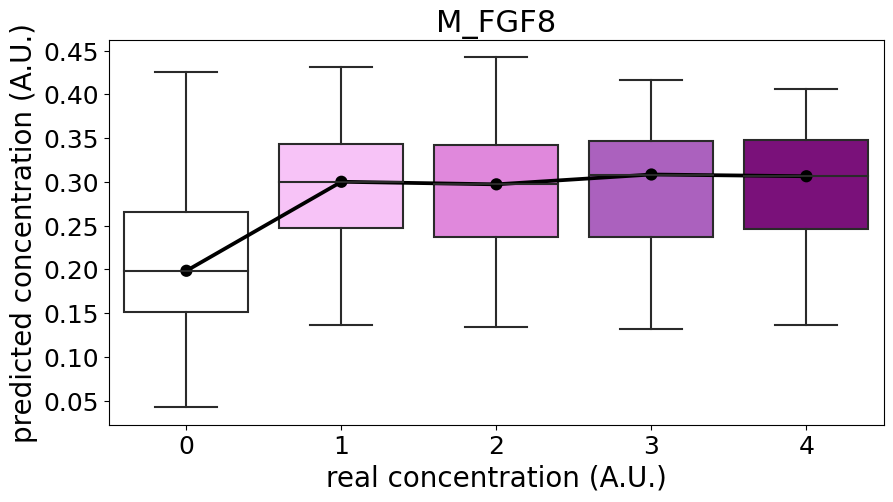

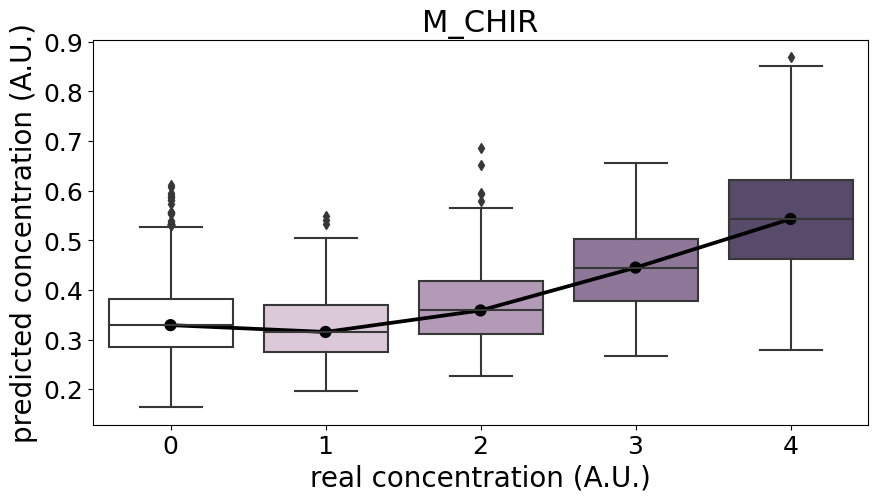

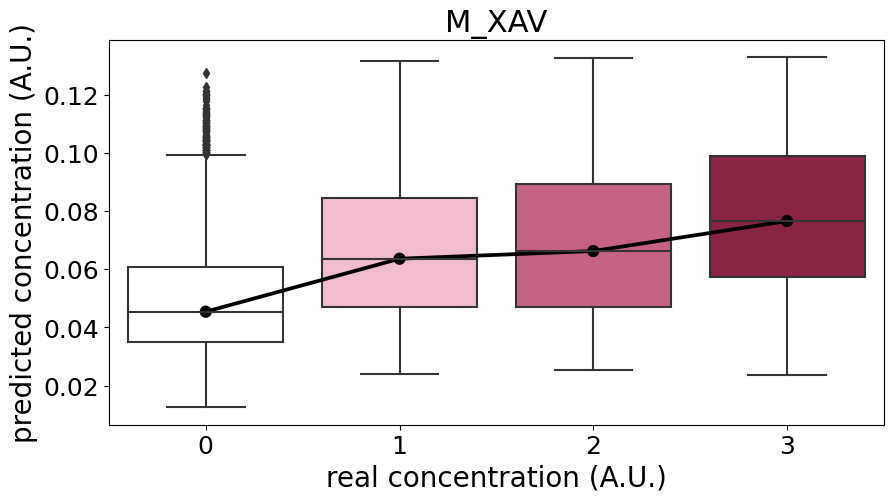

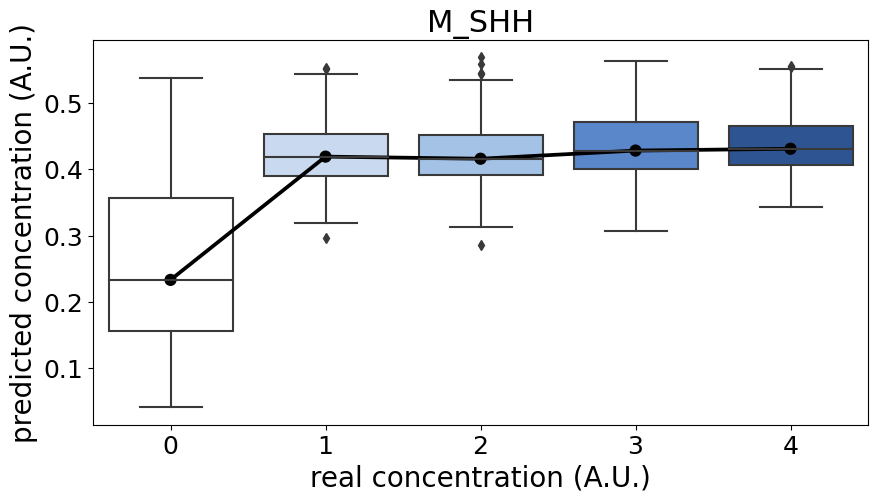

In [15]:
for morph in ['M_RA','M_BMP4','M_FGF8','M_CHIR','M_XAV','M_SHH']:  
    plt.figure(figsize=(10,5))
    comb[morph] = comb[morph].astype('float')
    comb[morph+"_pred"] = comb[morph+"_pred"].astype('float')
    sns.boxplot(data=comb, x=morph, y=morph+'_pred',palette=color_dict[morph])
    # Calculate the medians
    medians = comb.groupby(morph)[morph+'_pred'].median().values

    # Create the trendline (curve)
    x_vals = np.arange(len(medians))
    sns.pointplot(x=x_vals, y=medians, color='black', markers='o')

    plt.ylabel('predicted concentration (A.U.)',fontsize=20)
    plt.xlabel('real concentration (A.U.)',fontsize=20)
    plt.title(morph,fontsize=22)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.savefig("figures/multiregressor/"+sample+"_"+morph+"_colored_boxplot_black.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("figures/multiregressor/"+sample+"_"+morph+"_colored_boxplot_black.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()